In [1]:
from nixtlats import NixtlaClient

API key

In [14]:
from dotenv import load_dotenv
import os

nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = os.getenv("NIXTLATS_API_KEY")
)

nixtla_client.validate_api_key()

INFO:nixtlats.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [2]:
from dotenv import load_dotenv
import os

# Set the TimeGPT API key
def set_api_key():
    load_dotenv()
    api_key = os.getenv("NIXTLATS_API_KEY")
    if api_key is None:
        raise ValueError("Please set the NIXTLATS_API_KEY environment variable")
    
set_api_key()

In [20]:
import pandas as pd
import os

# read train data
path = os.path.join('..','data','climate', 'splits', 'train', 'train.csv')
path_val = os.path.join('..','data','climate', 'splits', 'val', 'val.csv')
path_test = os.path.join('..','data','climate', 'splits', 'test', 'test.csv')


# concatenate train and val data
df_train = pd.read_csv(path)
df_test = pd.read_csv(path_test)
df_val = pd.read_csv(path_val)

len(df_train), len(df_val), len(df_test)


(1449, 181, 182)

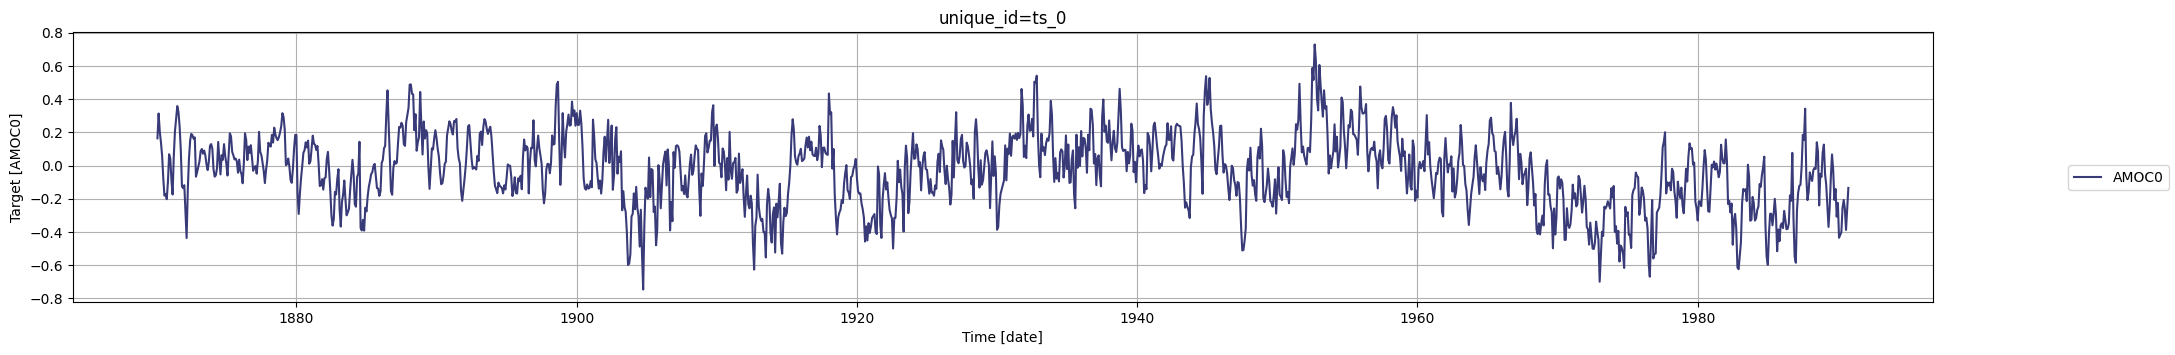

In [18]:
import matplotlib
import matplotlib.pyplot as plt

# plotting all data
nixtla_client.plot(df, time_col='date', target_col='AMOC0')

"In the context of monthly data, a period exceeding two years would typically be classified as long-horizon forecasting." URL: https://docs.nixtla.io/docs/forecasting_on_a_long_horizon

* **df**: A pandas dataframe containing the time series data.
* **h**: The number of steps ahead to forecast (in this case in months (MS = month start)).
* **freq**: The frequency of the time series in Pandas format. See pandas’ available frequencies (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
* **time_col**: Column that identifies the datestamp column.
* **target_col**: The variable that we want to forecast.

forecasting the next 12 months using the SDK forecast method:

In [19]:
# forecasting 12 steps ahead
timegpt_fcst_df = nixtla_client.forecast(df=df, h=12, freq='MS', time_col='date', target_col='AMOC0')
timegpt_fcst_df

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...


,date,TimeGPT
0,1990-11-01,-0.162219
1,1990-12-01,-0.206121
2,1991-01-01,-0.217433
3,1991-02-01,-0.290990
4,1991-03-01,-0.309658
5,1991-04-01,-0.313456
6,1991-05-01,-0.320997
7,1991-06-01,-0.292634
8,1991-07-01,-0.283855
9,1991-08-01,-0.277421


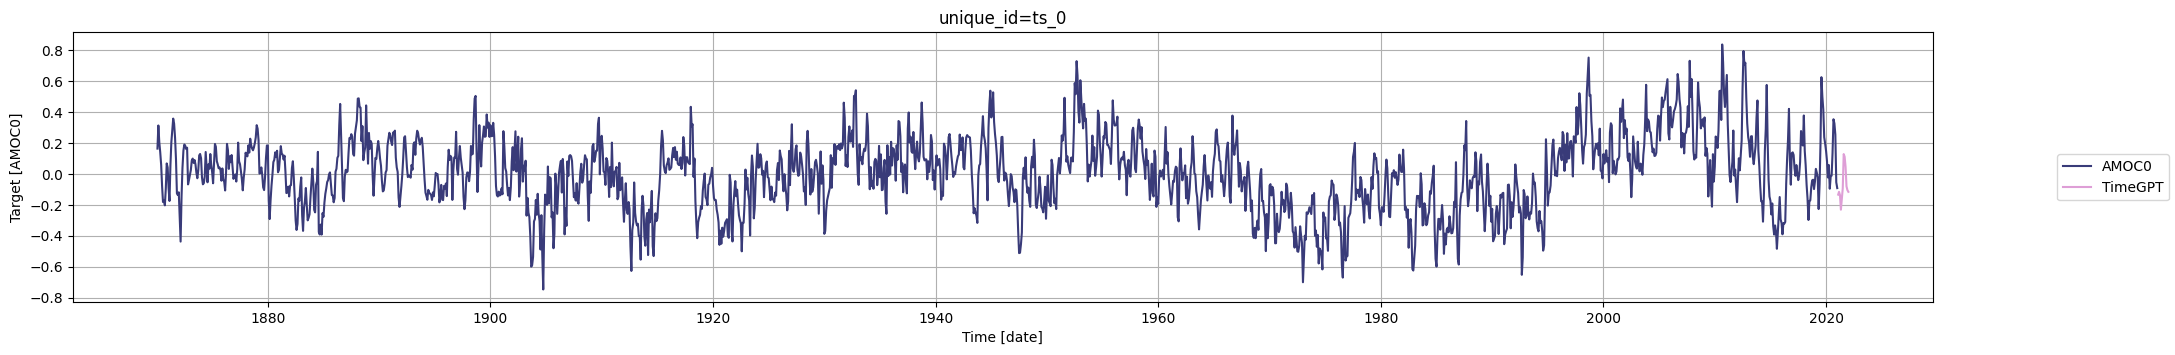

In [36]:
# same plot as above, this time with the forecast (lyserød streg til sidst)
nixtla_client.plot(df, timegpt_fcst_df, time_col='date', target_col='AMOC0')

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...


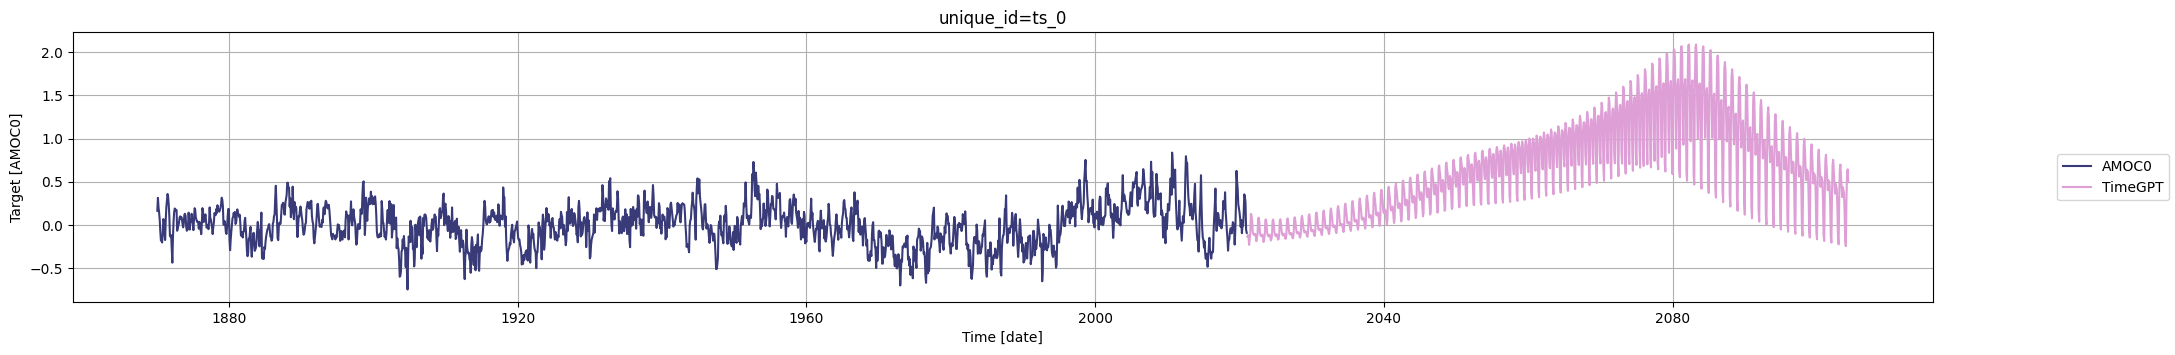

In [39]:
# forecasting and plotting the next 30 years (12*30 = 360)
timegpt_fcst_df = nixtla_client.forecast(df=df, h=1000, freq='MS', time_col='date', target_col='AMOC0')
nixtla_client.plot(df, timegpt_fcst_df, time_col='date', target_col='AMOC0')

More functionalities to look into:

1. Forecasting on long horizon: https://docs.nixtla.io/docs/forecasting_on_a_long_horizon
2. Prediction intervals, how uncertain is prediction "a prediction interval gives an estimated range within which a future observation will fall": https://docs.nixtla.io/docs/prediction_intervals
3. forecasting on irregular timestamps: https://docs.nixtla.io/docs/forecasting_time_series_with_irregular_timestamps
4. Cross validation: https://docs.nixtla.io/docs/cross_validation